In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler

In [223]:
linnerud=load_linnerud()

In [224]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [225]:
df1 = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [226]:
df1

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [227]:
df1.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [228]:
df1.shape

(20, 3)

In [229]:
linnerud.target_names

['Weight', 'Waist', 'Pulse']

In [230]:
df2=pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [231]:
df2

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0
5,182.0,36.0,56.0
6,211.0,38.0,56.0
7,167.0,34.0,60.0
8,176.0,31.0,74.0
9,154.0,33.0,56.0


In [232]:
df = pd.concat([df1,df2['Pulse']], axis=1)

In [233]:
df.head()

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0


In [234]:
df.isna().sum()

Chins     0
Situps    0
Jumps     0
Pulse     0
dtype: int64

In [235]:
#from IPython.display import Image #pip install IPython
#Image("C:/Users/GC/cap.png")

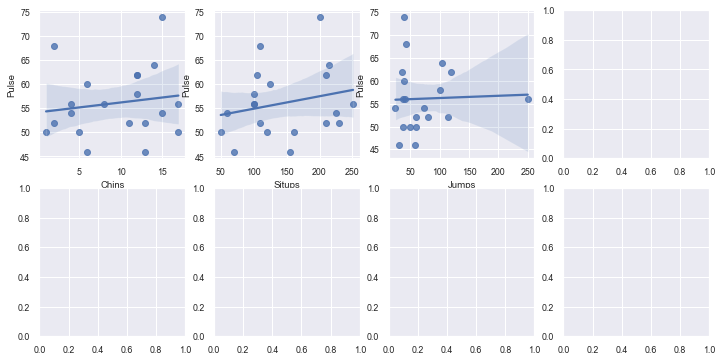

In [236]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(12,6), ncols=4, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps']

# i에는 인덱스가 feature에는 'Chins', 'Situps', 'Jumps'까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/3) # 2행
    col = i%3

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

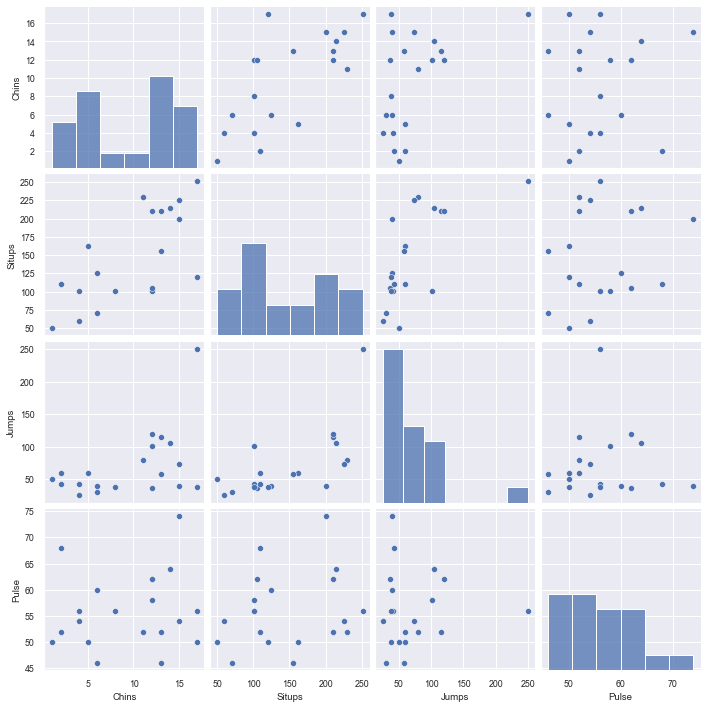

In [237]:
sns.pairplot(data,
             vars=['Chins', 'Situps', 'Jumps', 'Pulse'])
plt.show()

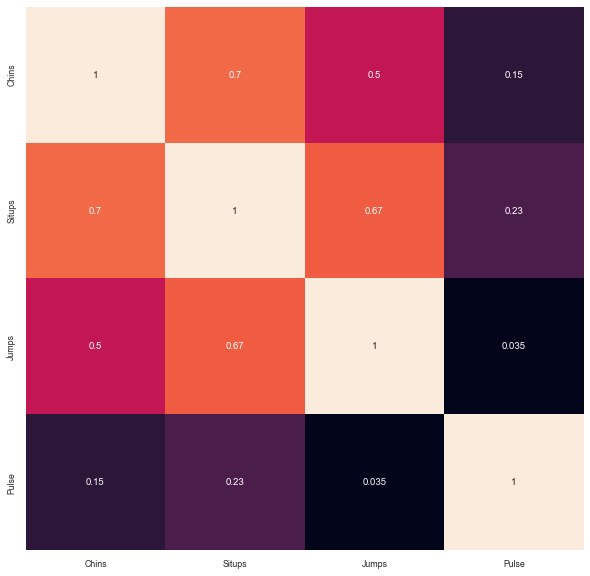

In [238]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [239]:
#scaler = StandardScaler()

In [240]:
#df = scaler.fit_transform(df)
#display(df)

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [242]:
from sklearn.model_selection import train_test_split

x_data=df.drop('Pulse',axis=1)
y_data=df['Pulse']
#x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
#y_data=df.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                 y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [243]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [244]:
y_train.head()

14    46.0
16    54.0
10    50.0
8     74.0
5     56.0
Name: Pulse, dtype: float64

In [245]:
lr = LinearRegression()

In [246]:
lr.fit(X_train, y_train)

LinearRegression()

In [247]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [ 0.4  0.  -0. ]
상수항(절편): 49.1


In [248]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [249]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 75.724, RMSE: 8.702
Variance score : -0.771


In [250]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 49.06436018104749
회귀계수: [ 0.4  0.  -0. ]


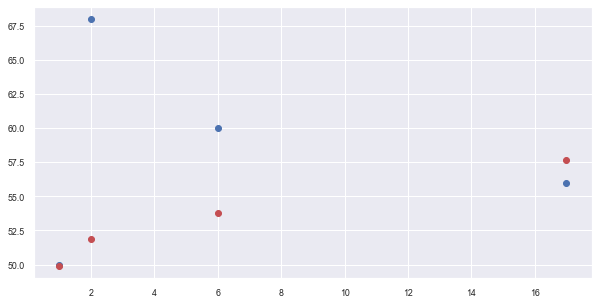

In [251]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

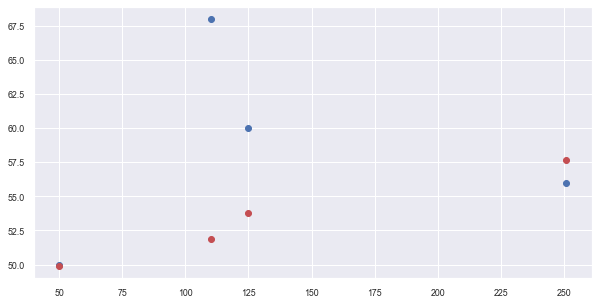

In [253]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

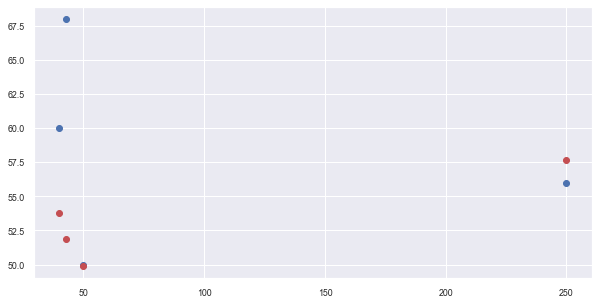

In [252]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  